# Regression Practice

## Import package

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from scipy import stats

-----

## Load Data

사이킷런에 내장된 보스턴 주택 가격 데이터

- CRIM : 지역별 범죄 발생률  
- ZN : 25,000 평방피트를 초과하는 거주 지역의 비율  
- INDUS : 비상업 지역 넓이 비율  
- CHAS : 찰스강에 대한 더미 변수  
    - (강의 경계에 위치한 경우는 1, 아니면 0  
- NOX : 일산화질소 농도  
- RM : 방 개수  
- AGE : 1940년 이전에 건축된 소유 주택의 비율  
- DIS : 5개 주요 고용센터까지의 거리  
- RAD : 고속도로 접근 용이도 지수  
- TAX : 10,000 달러 당 재산세율  
- PTRAIO : town별 학생/교사 비율  
- B : town별 흑인의 비율  
- LSTAT : 하위계층 비율(%)  
- MEDV : 본인 소유의 주택가격(중앙값) (단위: $1,000)

In [101]:
from sklearn.datasets import load_boston

import warnings
warnings.filterwarnings('ignore')

In [102]:
boston = load_boston()

In [103]:
df_boston = pd.DataFrame(boston.data, columns=boston.feature_names)

In [104]:
df_train = pd.read_csv('boston_house_price.csv')

In [105]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [106]:
df_boston['PRICE'] = boston.target

In [107]:
df_boston.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [108]:
# df_boston.columns = ["INDEX", "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT", "PRICE"]
df_boston.to_csv('boston_house_price.csv', header=True, index=False)

In [109]:
df_boston.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


=> non-null, all data is float types

-----

## EDA

#### seaborn - regplot() : X, Y 축 값의 산점도와 함께 선형 회귀 직선을 그려줌

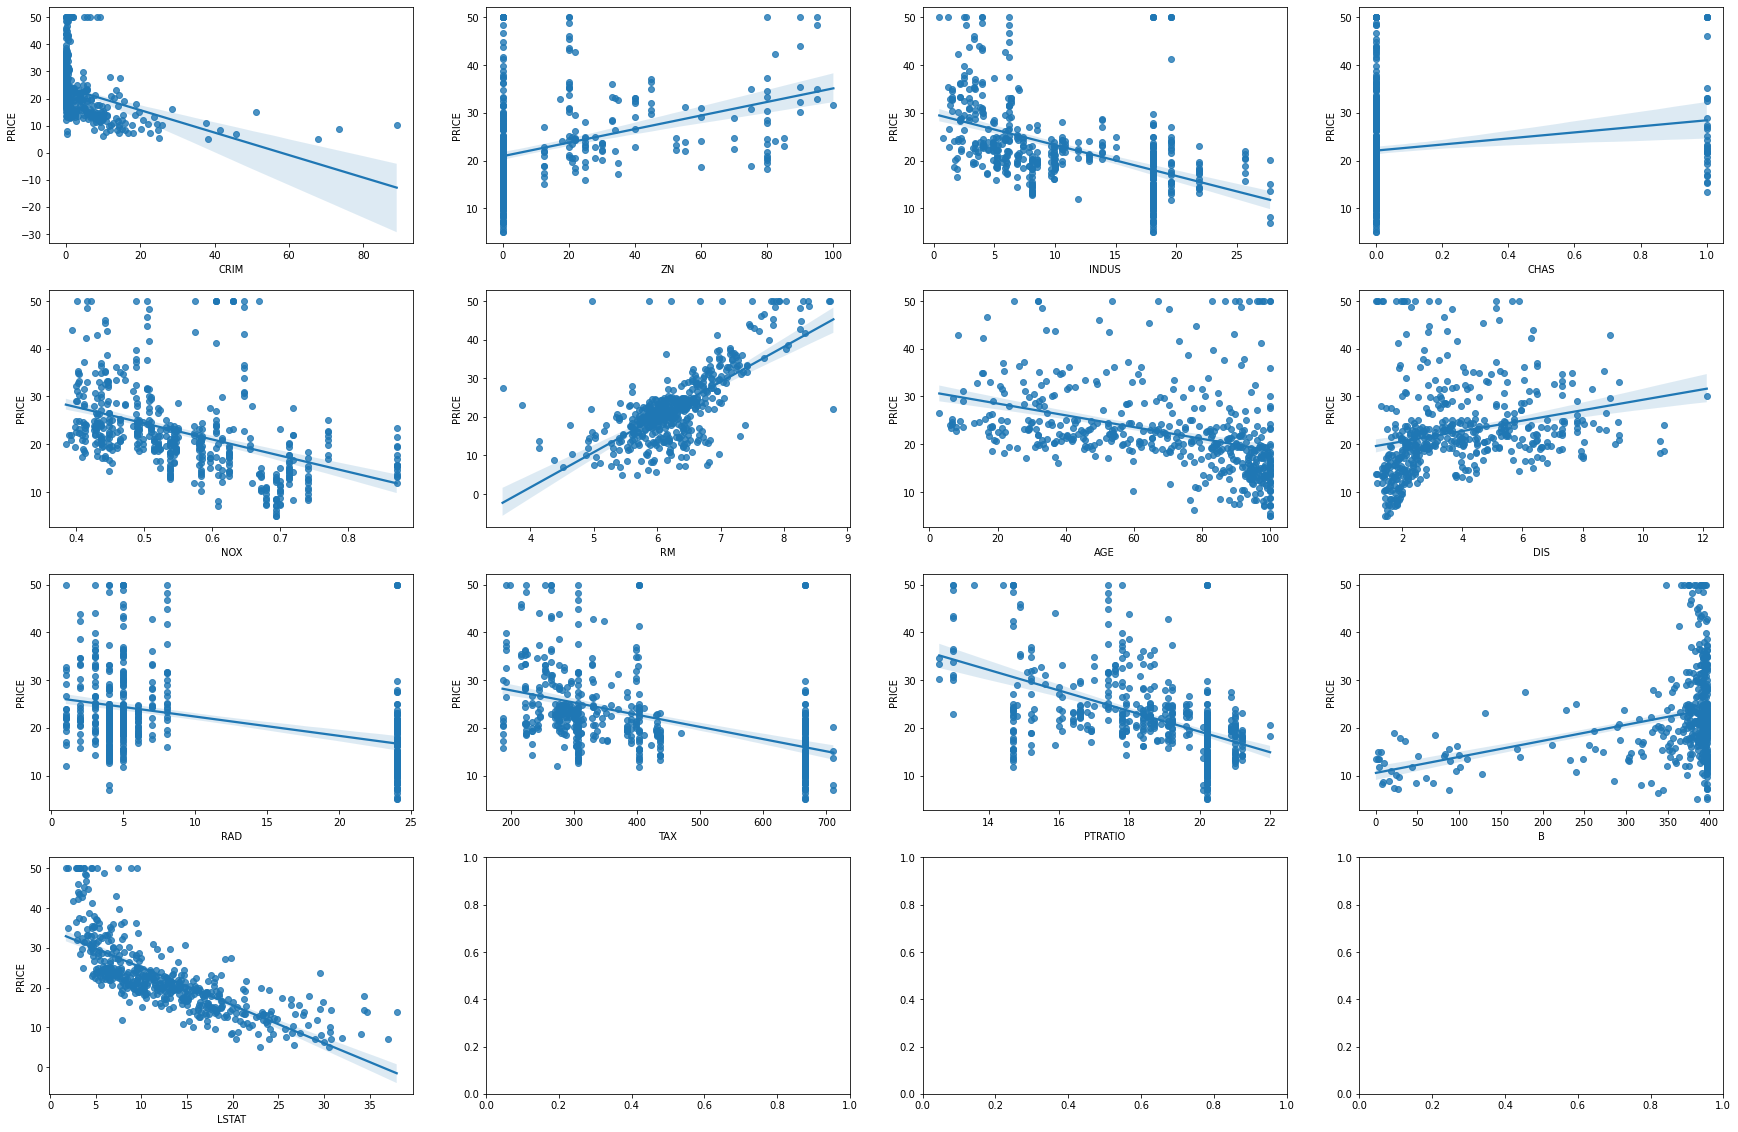

In [110]:
fig,axs = plt.subplots(figsize=(30,20),ncols=4,nrows=4)
lm_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i,feature in enumerate(lm_features):
    row=int(i/4)    
    col=i%4

    sns.regplot(x=feature,y='PRICE',data=df_boston,ax=axs[row][col])


=> RM, LSTAT의 PRICE 영향도가 가장 두드러지게 나타남  
    - RM : Positive Linearity  
    - LSTAT : Negative Linearity  

-----

## PreProcessing

### Feature Scaling

### Train, Test set split

In [111]:
from sklearn.model_selection import train_test_split

In [112]:
y_target = df_boston['PRICE']
x_data = df_boston.drop(['PRICE'], axis=1, inplace=False)

x_train, x_test, y_train, y_test = train_test_split(x_data,y_target,test_size=0.3,random_state=156)

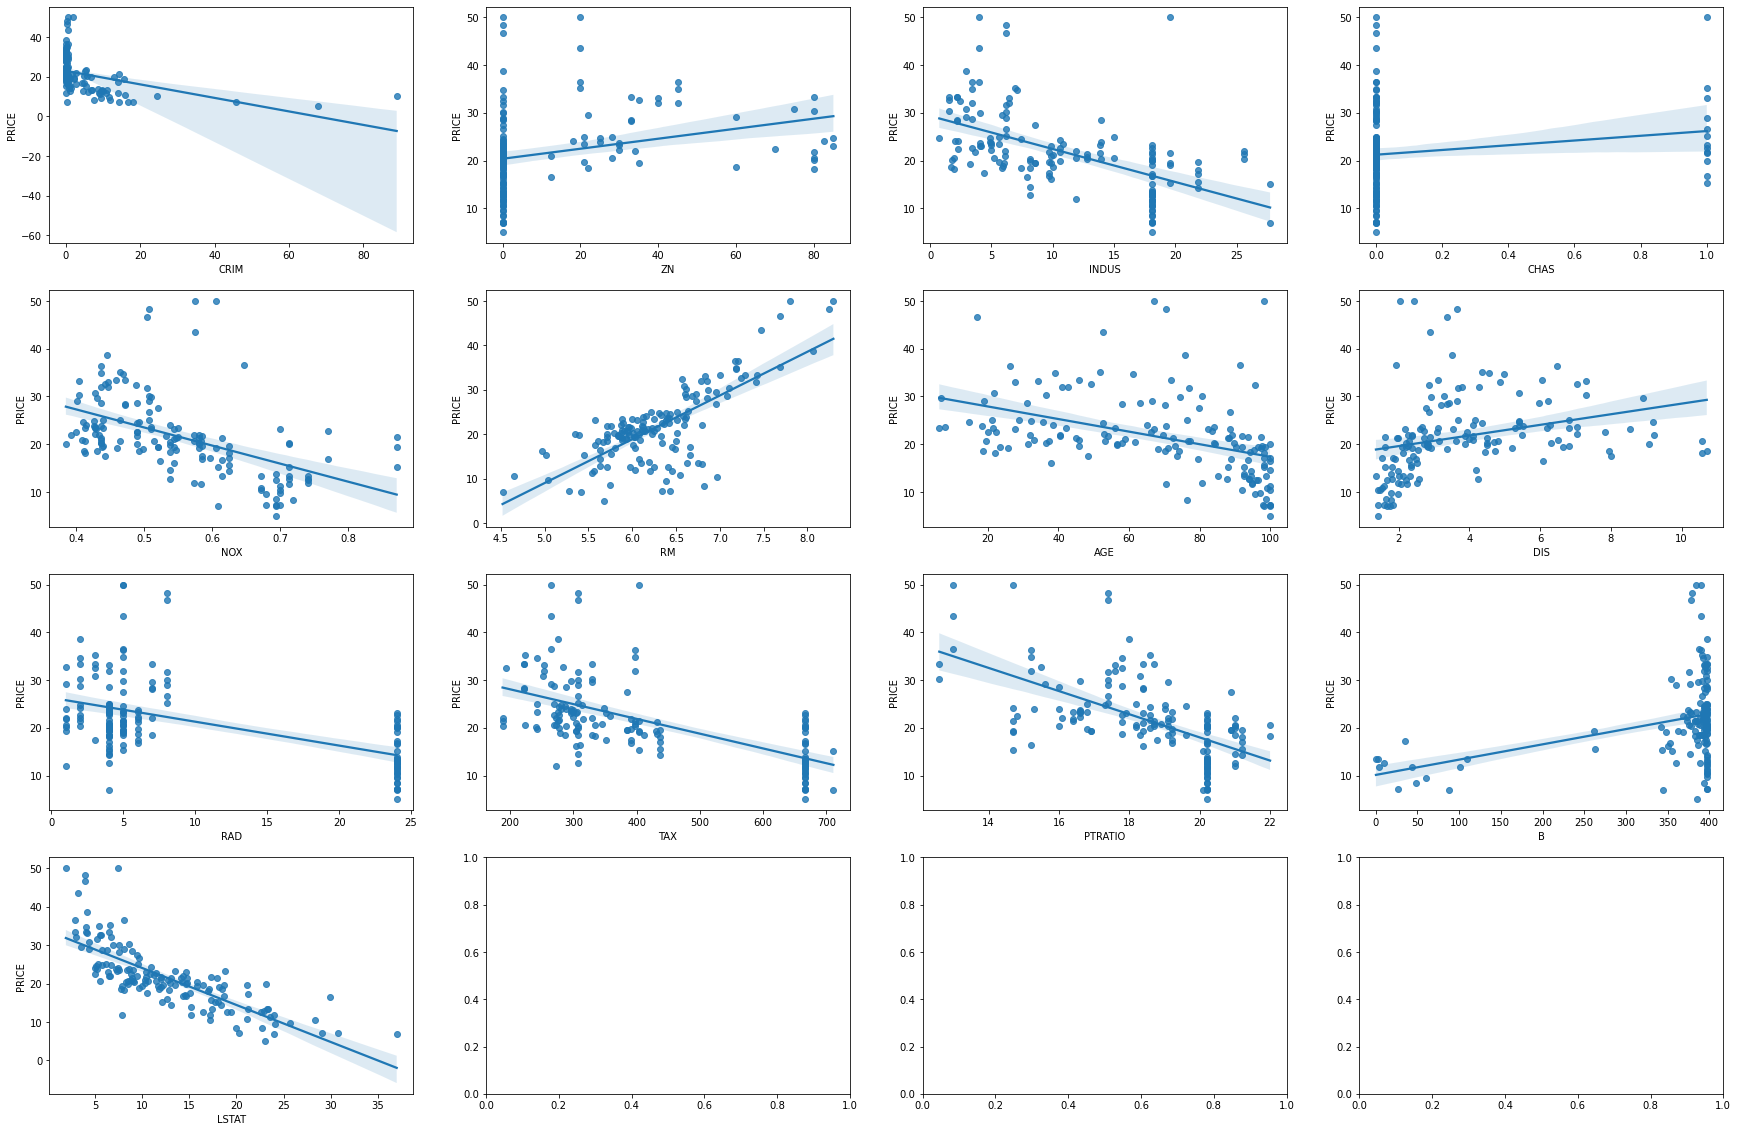

In [147]:
fig,axs = plt.subplots(figsize=(30,20),ncols=4,nrows=4)
lm_features=['CRIM','ZN','INDUS','CHAS','NOX','RM','AGE','DIS','RAD','TAX','PTRATIO','B','LSTAT']

for i,feature in enumerate(lm_features):
    row=int(i/4)    
    col=i%4

    sns.regplot(x=feature,y=y_test,data=x_test,ax=axs[row][col])

-----

## Prediction by Model

### Evaluation Metric : MSE, R2 Score, 5 fold average RMSE

In [113]:
from sklearn.metrics import mean_squared_error, r2_score

In [114]:
def eval_models(answer, model):
    mse = mean_squared_error(answer, model)
    rmse = np.sqrt(mse)

    print(f'MSE : {mse:.3f}, RMSE : {rmse:.3f}')
    print(f'Variance score : {r2_score(answer,model):.3f}')

In [115]:
from sklearn.model_selection import cross_val_score

def cross_val_score_model(model, data, label):
    neg_mse_scores = cross_val_score(model, x_data, y_target, scoring="neg_mean_squared_error", cv=5, random_state=10)
    rmse_scores = np.sqrt(-1 * neg_mse_scores)
    avg_rmse = np.mean(rmse_scores)

    print(f'Negative MSE scores : {np.round(neg_mse_scores, 2)}')
    print(f'RMSE scores : {np.round(rmse_scores, 2)}')
    print(f'Avg RMSE : {avg_rmse:.3f}')

### Model : LinearRegression

In [116]:
from sklearn.linear_model import LinearRegression

In [117]:
lr = LinearRegression()
lr.fit(x_train, y_train)

lr_preds = lr.predict(x_test)

eval_models(y_test, lr_preds)

MSE : 17.297, RMSE : 4.159
Variance score : 0.757


In [118]:
cross_val_score_model(lr, x_data, y_target)

Negative MSE scores : [-12.46 -26.05 -33.07 -80.76 -33.31]
RMSE scores : [3.53 5.1  5.75 8.99 5.77]
Avg RMSE : 5.829


In [119]:
print(f'intercept : {lr.intercept_}')
print(f'coefficients : {np.round(lr.coef_,1)}')

coeff = pd.Series(data=np.round(lr.coef_,1), index=x_data.columns)
coeff.sort_values(ascending=False)

intercept : 40.995595172164336
coefficients : [ -0.1   0.1   0.    3.  -19.8   3.4   0.   -1.7   0.4  -0.   -0.9   0.
  -0.6]


RM          3.4
CHAS        3.0
RAD         0.4
ZN          0.1
INDUS       0.0
AGE         0.0
TAX        -0.0
B           0.0
CRIM       -0.1
LSTAT      -0.6
PTRATIO    -0.9
DIS        -1.7
NOX       -19.8
dtype: float64

=> 회귀 계수 : 기울기 계수

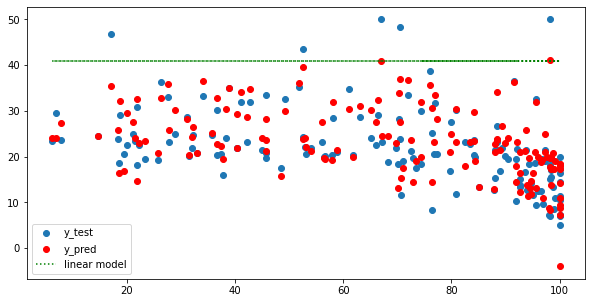

In [145]:
target = 'AGE'

plt.figure(figsize=(10,5))
plt.scatter(x_test[target], y_test, label='y_test')
plt.scatter(x_test[target], lr_preds, c='r', label='y_pred')
plt.plot(x_test[target], coeff[target]*x_test[target]+lr.intercept_, 'g:', label='linear model')
plt.legend(loc='best')
plt.show()

### Model : Polynomial Regression

In [121]:
from sklearn.preprocessing import PolynomialFeatures

In [122]:
poly_ftr_train = PolynomialFeatures(degree=2).fit_transform(x_train)

poly_lr = LinearRegression()
poly_lr.fit(poly_ftr_train, y_train)


poly_ftr_test = PolynomialFeatures(degree=2).fit_transform(x_test)
poly_lr_preds = poly_lr.predict(poly_ftr_test)

eval_models(y_test, poly_lr_preds)


MSE : 41.731, RMSE : 6.460
Variance score : 0.414


In [123]:
print(f'intercept : {poly_lr.intercept_}')
print(f'coefficients : {np.round(poly_lr.coef_,1)}')

# coeff = pd.Series(data=np.round(poly_lr.coef_,1), index=x_data.columns)
# coeff.sort_values(ascending=False)

intercept : 1090637192.0808947
coefficients : [-1.09063739e+09 -8.10000000e+00 -1.00000000e-01 -7.00000000e+00
  3.70000000e+01  2.53600000e+02  3.10000000e+01  1.20000000e+00
 -1.20000000e+01  3.10000000e+00 -1.00000000e-01  7.80000000e+00
  0.00000000e+00  5.00000000e-01 -0.00000000e+00  3.00000000e-01
  6.00000000e-01  1.90000000e+00 -1.00000000e-01 -0.00000000e+00
  0.00000000e+00 -1.00000000e-01  6.00000000e-01 -1.00000000e-01
  1.00000000e+00 -0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -2.00000000e-01 -2.10000000e+00 -1.00000000e-01
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -5.00000000e-01 -1.00000000e-01  2.00000000e-01  0.00000000e+00
  2.00000000e-01 -0.00000000e+00  0.00000000e+00 -1.00000000e-01
  0.00000000e+00 -0.00000000e+00  3.70000000e+01 -2.92000000e+01
 -6.00000000e+00 -0.00000000e+00  1.70000000e+00  0.00000000e+00
  0.00000000e+00 -2.00000000e+00  0.00000000

### Model : Regularized Linear Regression (Ridge, Lasso, Elastic)

Ridge : L2 Regularization

In [124]:
from sklearn.linear_model import Ridge

In [125]:
ridge = Ridge(alpha=100)

cross_val_score_model(ridge, x_data, y_target)

Negative MSE scores : [-12.82 -27.28 -34.68 -52.69 -22.05]
RMSE scores : [3.58 5.22 5.89 7.26 4.7 ]
Avg RMSE : 5.330


Lasso : L1 Regularization

In [126]:
from sklearn.linear_model import Lasso

In [127]:
lasso = Lasso(alpha=0.07)

cross_val_score_model(lasso, x_data, y_target)

Negative MSE scores : [-11.17 -24.38 -28.54 -80.49 -29.9 ]
RMSE scores : [3.34 4.94 5.34 8.97 5.47]
Avg RMSE : 5.612


Elastic : L1&L2 Regularization

In [128]:
from sklearn.linear_model import ElasticNet

In [129]:
elas = ElasticNet(alpha=0.5, l1_ratio=0.7)

cross_val_score_model(elas, x_data, y_target)

Negative MSE scores : [-13.14 -28.19 -40.67 -54.66 -21.42]
RMSE scores : [3.63 5.31 6.38 7.39 4.63]
Avg RMSE : 5.467


In [134]:
elas.fit(x_train, y_train)

elas_preds = elas.predict(x_test)

eval_models(y_test, elas_preds)

print(f'intercept : {elas.intercept_}')
print(f'coefficients : {np.round(elas.coef_,1)}')

elas_coeff = pd.Series(data=np.round(elas.coef_,1), index=x_data.columns)
elas_coeff.sort_values(ascending=False)

MSE : 19.801, RMSE : 4.450
Variance score : 0.722
intercept : 37.077054962175424
coefficients : [-0.1  0.1 -0.   0.  -0.   1.7  0.  -1.2  0.3 -0.  -0.7  0.  -0.7]


RM         1.7
RAD        0.3
ZN         0.1
INDUS     -0.0
CHAS       0.0
NOX       -0.0
AGE        0.0
TAX       -0.0
B          0.0
CRIM      -0.1
PTRATIO   -0.7
LSTAT     -0.7
DIS       -1.2
dtype: float64

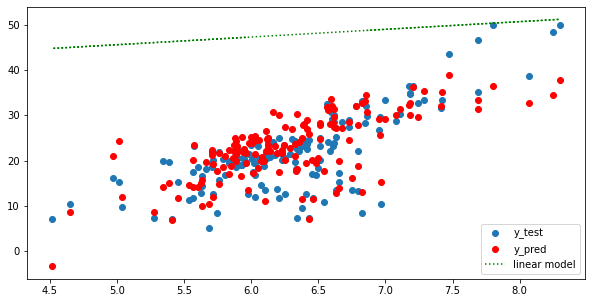

In [148]:
target = 'RM'

plt.figure(figsize=(10,5))
plt.scatter(x_test[target], y_test, label='y_test')
plt.scatter(x_test[target], elas_preds, c='r', label='y_pred')
plt.plot(x_test[target], elas_coeff[target]*x_test[target]+elas.intercept_, 'g:', label='linear model')
plt.legend(loc='best')
plt.show()